## MNIST 1

The MNIST dataset consists of images of handwritten digits comprising of 55,000 training examples, 10,000 training examples and 5000 validation examples.  They originate from http://yann.lecun.com/exdb/mnist/

The dataset has been processed so all of the images are size-normalized, centered and changed to a fixed size image of 28 x 28 pixels greyscale with each pixel having a value between 0 and 1.  

The current state of the art error rate is well below 1% (0.21% ICML 2013)

Example image: 
![alt text](https://www.tensorflow.org/images/MNIST-Matrix.png "From Tensorflow.org")



Our aim is to train the network to accuratly predict a label (0->9) from an input image

### Import libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

### Get Data
Tensorflow gives us a prebuilt function to download the MNIST dataset from the web.

These are store in training and test variables.
The reason we use separate training and test is to make sure the system learns and doesnt simply memorise the task.  So once it is trained on the training dataset we will test how it goes on data it has never seen before.  The test dataset.

This will not be a state of the art system but it will help introduce you to working with real data.

Softmax regression

In [7]:
# Import MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels
X_validation = mnist.validation.images
Y_validation = mnist.validation.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [8]:
print "Train: " , len(X_train)
print "Test: " ,len(X_test)
print "Validation: ",len(X_validation)

# This is what the data looks like
print("[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9 ]")
print(Y_train[0])
print(X_train[0])



Train:  55000
Test:  10000
Validation:  5000
[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9 ]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        

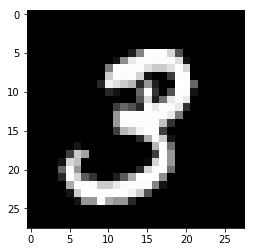

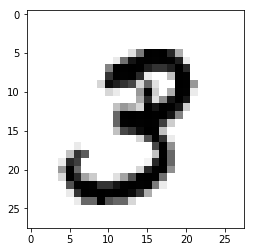

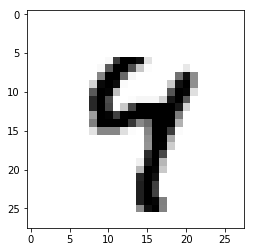

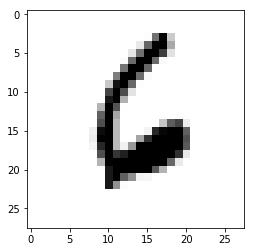

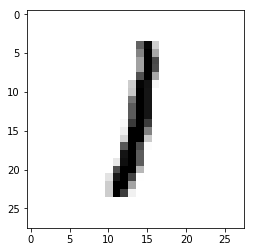

In [9]:
def display_mnist(input_array, invert = False):
    first_image = []
    if invert:
        first_image = np.array(input_array*255, dtype='uint8')
    else:
        first_image = np.array((1-input_array)*255, dtype='uint8')

    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# Call function on different training data
display_mnist(X_train[1],True)
display_mnist(X_train[1])

display_mnist(X_train[2])
display_mnist(X_train[3])
display_mnist(X_train[4])


In [10]:
#Network Parameters
INPUTS = 784       # 28 x 28 = 784 input pixels
HIDDEN_1 = 200      # we will start with a NN with 1 hidden layer and 40 nodes.
OUTPUTS = 10       # 10 possible outputs - 0->9

#Training Parameters
epochs = 10000          
display_epochs = 50    
batch_size = 1000   
learning_rate = 0.001      

In [11]:
#Use placeholders to pass our input and output data into the system
x_data = tf.placeholder(dtype=tf.float32,shape=[None, INPUTS],name="input")
y_data = tf.placeholder(dtype=tf.float32,shape=[None, OUTPUTS],name="output")

In [12]:
#Structure
weight1 = tf.random_normal([INPUTS, HIDDEN_1], mean=0.5, stddev=0.7)
weight1 = tf.Variable(weight1, name='W1')

bias1 = tf.random_normal([HIDDEN_1], mean=0.5, stddev=0.7)
bias1 = tf.Variable(bias1, name='B1')

weight2 = tf.random_normal([HIDDEN_1, OUTPUTS], mean=0.5, stddev=0.7)
weight2 = tf.Variable(weight2, name='W2')

bias2 = tf.random_normal([OUTPUTS], mean=0.5, stddev=0.7)
bias2 = tf.Variable(bias2, name='B2')

#input to hidden
hidden1 = tf.nn.relu(tf.matmul(x_data, weight1) + bias1)

#hidden to output
y = tf.matmul(hidden1, weight2) + bias2

#apply final activation
result = tf.nn.softmax(y)

In [13]:
#loss and training
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_data))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)


In [14]:
init = tf.global_variables_initializer()
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(init)

Instead of processing all 55,000 training examples every step we chose a random sample.  A batch.  Of training data.  This speeds up processing.

In [15]:


for step in range(epochs):
    #get a random batch of data
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    #run the training and the loss
    out_training , out_loss = session.run([train,loss],feed_dict={x_data: batch_x, y_data: batch_y})

        
    if step % display_epochs == 0:
        print("Step: %04d error: %g "%(step,out_loss))


Step: 0000 error: 942.332 
Step: 0050 error: 166.208 
Step: 0100 error: 26.0382 
Step: 0150 error: 14.9305 
Step: 0200 error: 10.7161 
Step: 0250 error: 8.72051 
Step: 0300 error: 7.55815 
Step: 0350 error: 6.20647 
Step: 0400 error: 5.03782 
Step: 0450 error: 6.02623 
Step: 0500 error: 4.45626 
Step: 0550 error: 4.24145 
Step: 0600 error: 4.38038 
Step: 0650 error: 4.14162 
Step: 0700 error: 3.7835 
Step: 0750 error: 3.77452 
Step: 0800 error: 3.43648 
Step: 0850 error: 2.93171 
Step: 0900 error: 3.08726 
Step: 0950 error: 2.86989 
Step: 1000 error: 3.47689 
Step: 1050 error: 3.21806 
Step: 1100 error: 2.81389 
Step: 1150 error: 2.61996 
Step: 1200 error: 2.76168 
Step: 1250 error: 2.16799 
Step: 1300 error: 1.96595 
Step: 1350 error: 2.70449 
Step: 1400 error: 1.92502 
Step: 1450 error: 2.10182 
Step: 1500 error: 1.87298 
Step: 1550 error: 1.75721 
Step: 1600 error: 2.08316 
Step: 1650 error: 1.44086 
Step: 1700 error: 2.07904 
Step: 1750 error: 1.63605 
Step: 1800 error: 1.95268 
St

In [16]:
print "Complete"
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_data, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
accuracy = session.run(accuracy,feed_dict={x_data: mnist.test.images, y_data: mnist.test.labels})
print "Accuracy:", "{:.0%}".format(accuracy)

Complete
Accuracy: 90%


In [17]:
#needs the session open
def bar_graph(x1,y1):
    probabilities = session.run(result, feed_dict={x_data: x1, y_data: y1})
    label = session.run(tf.argmax(y1, 1))
    predicted = session.run(tf.argmax(probabilities, 1))

    print "Actual:",label[0], " Predicted: ", predicted[0]
    display_mnist(x1)
    y=probabilities[0]
    N = len(probabilities[0])
    x = range(N)
    width = 1/1.5
    plt.bar(x, y, width, color="blue")
    plt.show()

Actual: 3  Predicted:  3


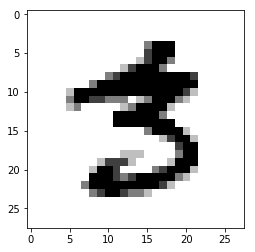

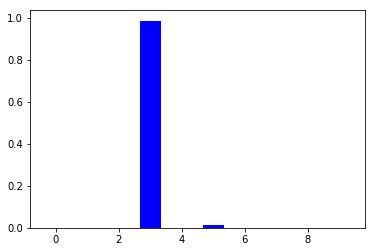

In [18]:

x1, y1 = mnist.test.next_batch(1)
bar_graph(x1,y1)


In [19]:
session.close()